In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab
import json
import re

In [11]:
from plotnine import *

In [2]:
%matplotlib inline

In [27]:
recipe_id_pattern = re.compile(r'^.*?\/(R-R[0-9]+)\/.*$')

In [30]:
matches = recipe_id_pattern.match("https://www.ah.nl/allerhande/recept/R-R549836/pastasalade-met-zoete-wortel-en-basilicum")

In [34]:
matches.group(1)

'R-R549836'

In [48]:
with open('./recipes.json', 'r') as json_lines_file:
    json_recipes = [json.loads(line.strip()) for line in json_lines_file.readlines()]
    
ingredients_frame = pd.DataFrame([
    {
        'recipe_id': recipe_id_pattern.match(rcp['location']).group(1),
        'calories': int(rcp['calories'].replace('.','')[0:-5]) if rcp['calories'] else None,
        'course': rcp['course'],
        'ingredient': ingredient
    }
    for rcp in json_recipes
    for ingredient in rcp['ingredient_search_terms']
])

ingredients_frame.head()

,calories,course,ingredient,recipe_id
0,400.0,hoofdgerecht,middelgroot ei,R-R1185824
1,400.0,hoofdgerecht,verse groene asperge,R-R1185824
2,400.0,hoofdgerecht,arachideolie,R-R1185824
3,400.0,hoofdgerecht,paddenstoelenmix met puntpaprika en zoete ui,R-R1185824
4,400.0,hoofdgerecht,gedroogde dragon,R-R1185824


In [60]:
main_course_ingredients = ingredients_frame[
    ingredients_frame['course'] == 'hoofdgerecht'
]

In [91]:
np.percentile(counts.calories.values, 99.5)

284.37500000000091

In [99]:
common_ingredients = ['knoflook','traditionele olijfolie','ui','olijfolie','zonnebloemolie','middelgroot ei','boter','uien','olie','kraanwater','zout','water','arachideolie','halfvolle melk','bosui','tomaten','eieren','tarwebloem','tomaat','bloem','margarine','ei','melk','azijn']

In [122]:
main_course_ingredients_without_common = ingredients_frame[
    (ingredients_frame['course'] == 'hoofdgerecht')
    &
    (~ingredients_frame['ingredient'].isin(common_ingredients))
]

main_course_ingredients_without_common.head()

,calories,course,ingredient,recipe_id
1,400.0,hoofdgerecht,verse groene asperge,R-R1185824
3,400.0,hoofdgerecht,paddenstoelenmix met puntpaprika en zoete ui,R-R1185824
4,400.0,hoofdgerecht,gedroogde dragon,R-R1185824
5,400.0,hoofdgerecht,gerookte forelfilet,R-R1185824
6,400.0,hoofdgerecht,eikenbladslamelange,R-R1185824


In [125]:
counts = main_course_ingredients_without_common.groupby('ingredient').count().sort_values('course', ascending=False).reset_index()
counts['x'] = np.arange(0, len(counts))

/Users/friso/.virtualenvs/pandas/lib/python3.6/site-packages/plotnine/scales/scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


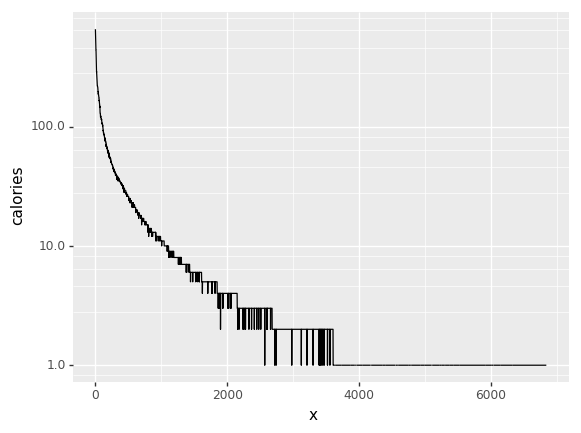

<ggplot: (-9223372036562983101)>

In [128]:
(
    ggplot(counts, aes(x='x', y='calories'))
    + geom_line()
    + scale_y_log10()
)

In [79]:
main_course_ingredients[ingredients_frame.ingredient.str.contains('tonijn')]

/Users/friso/.virtualenvs/pandas/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,calories,course,ingredient,recipe_id
292,685.0,hoofdgerecht,tonijnstukken in olie,R-R260528
627,585.0,hoofdgerecht,tonijnstukken in olijfolie,R-R627772
941,435.0,hoofdgerecht,tonijnsteak,R-R7696
1890,515.0,hoofdgerecht,tonijnsteaks,R-R416640
2628,710.0,hoofdgerecht,diepvries tonijnsteak,R-R405066
3529,745.0,hoofdgerecht,tonijnstukken in water,R-R1188186
3814,720.0,hoofdgerecht,tonijn op water,R-R422002
6050,740.0,hoofdgerecht,tonijnsteak,R-R491474
6523,630.0,hoofdgerecht,tonijnstukken in olijfolie,R-R1187009
6669,710.0,hoofdgerecht,tonijnstukken in olijfolie,R-R66158


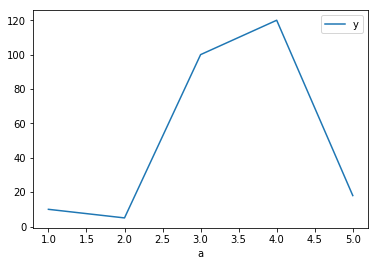

In [10]:
df.plot(kind='line', x='a', y='y');

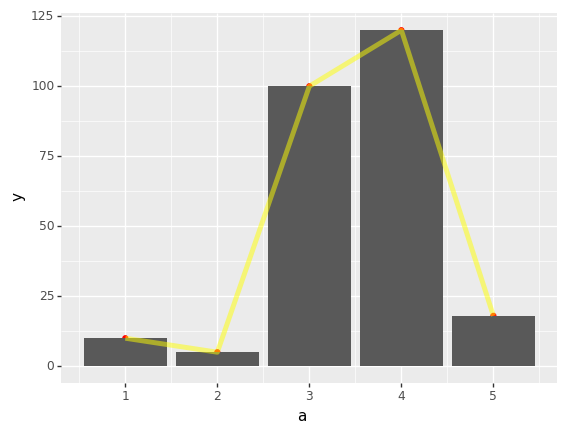

<ggplot: (-9223372036575121085)>

In [20]:
(
    ggplot(df, aes(x='a', y='y'))
    + geom_point(color='red')
    + geom_bar(stat='identity')
    + geom_line(color='yellow', size=2., alpha=.5)
)